In [1]:
# Install library yang diperlukan
!pip install pandas numpy scikit-learn seaborn matplotlib

# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# Load data
# Gantilah 'data.csv' dengan path file dataset Anda
df = pd.read_csv('cleaned_merged_heart_dataset.csv')

# Cek 5 baris pertama untuk memastikan data dimuat dengan benar
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Cek missing data
df.isnull().sum()

# Mengisi missing value dengan rata-rata kolom
df = df.fillna(df.mean())

# Cek lagi apakah sudah tidak ada data yang hilang
df.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exang,0
oldpeak,0


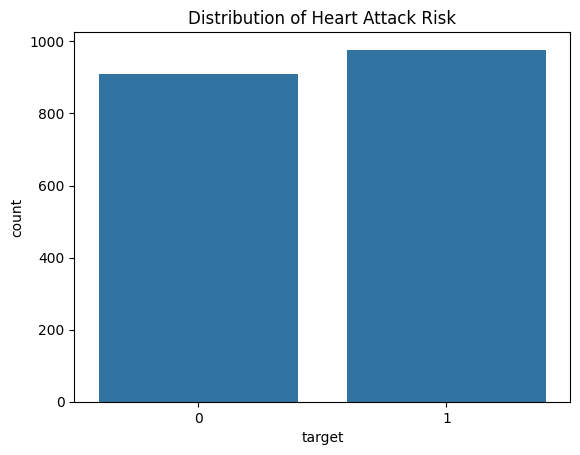

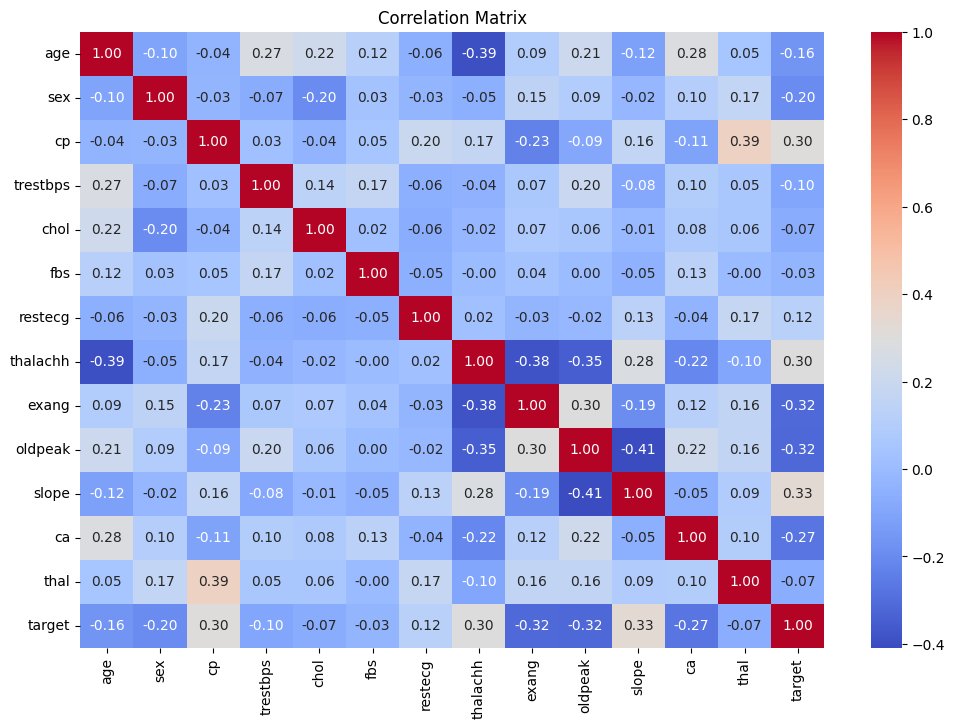

In [4]:
# Cek distribusi target variable
sns.countplot(x='target', data=df)
plt.title("Distribution of Heart Attack Risk")
plt.show()

# Cek korelasi antar fitur
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [5]:
# Pisahkan fitur (X) dan target (y)
X = df.drop('target', axis=1)
y = df['target']

# Bagi data menjadi train dan test set (80% untuk training, 20% untuk testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [6]:
# Standarisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Inisialisasi model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model
model.fit(X_train_scaled, y_train)

# Prediksi pada data test
y_pred = model.predict(X_test_scaled)


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       188
           1       0.98      0.96      0.97       190

    accuracy                           0.97       378
   macro avg       0.97      0.97      0.97       378
weighted avg       0.97      0.97      0.97       378



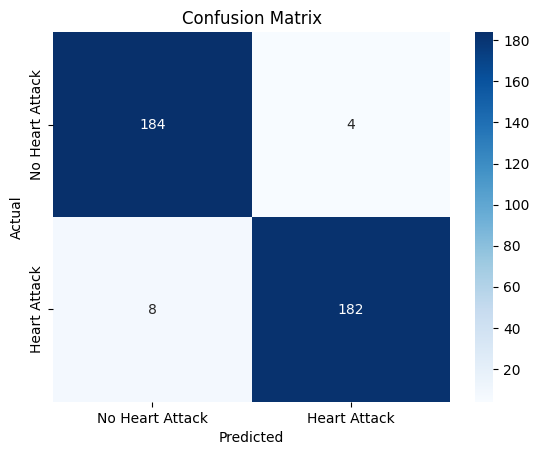

In [8]:
# Evaluation: Classification Report
print(classification_report(y_test, y_pred))

# Evaluation: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Attack', 'Heart Attack'], yticklabels=['No Heart Attack', 'Heart Attack'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [11]:
# Contoh data baru yang ingin diprediksi
new_data = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]])

# Standarisasi data baru menggunakan scaler yang sudah dilatih
new_data_scaled = scaler.transform(new_data)

# Prediksi menggunakan model
prediction = model.predict(new_data_scaled)

# Tampilkan hasil prediksi (1 = lebih besar risiko serangan jantung, 0 = risiko rendah)
print("Prediksi untuk data baru:", "Heart Attack Risk" if prediction[0] == 1 else "Low Heart Attack Risk")


Prediksi untuk data baru: Heart Attack Risk


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
from sklearn.model_selection import GridSearchCV

# Grid search untuk mencari parameter terbaik
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Tampilkan parameter terbaik
print("Best parameters found: ", grid_search.best_params_)


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}


In [13]:
from sklearn.metrics import accuracy_score

# Prediksi pada data uji
y_pred = model.predict(X_test_scaled)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)

print(f"Akurasi model: {accuracy * 100:.2f}%")


Akurasi model: 96.83%


In [14]:
from sklearn.metrics import classification_report

# Menghasilkan classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       188
           1       0.98      0.96      0.97       190

    accuracy                           0.97       378
   macro avg       0.97      0.97      0.97       378
weighted avg       0.97      0.97      0.97       378



In [15]:
import joblib

# Simpan model ke file
joblib.dump(model, 'heart_attack_model.pkl')


['heart_attack_model.pkl']

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib

# Asumsikan df adalah DataFrame yang berisi data yang sudah diproses
# Misalnya, kita mengambil fitur dan target dari df

X = df.drop(columns=['target'])  # Fitur tanpa kolom target
y = df['target']  # Kolom target

# Pisahkan data menjadi data pelatihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat scaler untuk standarisasi data
scaler = StandardScaler()

# Fit dan transform data pelatihan
X_train_scaled = scaler.fit_transform(X_train)

# Transformasi data uji
X_test_scaled = scaler.transform(X_test)

# Simpan scaler ke dalam file .pkl
joblib.dump(scaler, 'scaler.pkl')

# Sekarang kamu bisa menyimpan model setelah dilatih
# model = RandomForestClassifier()
# model.fit(X_train_scaled, y_train)
# joblib.dump(model, 'heart_attack_model.pkl')


['scaler.pkl']